In [37]:
import numpy as np
import matplotlib.pyplot as plt
curve_data = np.genfromtxt('data_2.csv', delimiter = ',')
x = curve_data[1:,0]
y = curve_data[1:,1]

x_squared = np.power(x,2)
x_matrix = np.transpose([x_squared, x, np.ones(np.shape(x))])
B = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_matrix), x_matrix)),
                  np.matmul(np.transpose(x_matrix), y))
    # print(B)
y_estimate = np.matmul(x_matrix, np.transpose(B))
    # plt.scatter(x_matrix[:,1], y, label = 'Scattered data')
    # plt.plot(x_matrix[:,1], y_estimate, 'r', label = 'Curve Fitting')
 



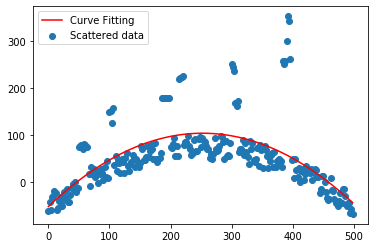

In [39]:
plt.scatter(x, y, label = 'Scattered data')
plt.plot(x, y_estimate, 'r', label = 'Curve Fitting')
plt.legend()
plt.show()

In [41]:
np.polyfit(x,y,2)

array([-2.45100969e-03,  1.23731380e+00, -5.19257342e+01])

In [42]:
B

array([-2.45100969e-03,  1.23731380e+00, -5.19257342e+01])

In [59]:
Breg

array([-2.42721752e-03,  1.22306752e+00, -5.01486169e+01])

In [57]:
y_estimatereg = np.matmul(x_matrix, np.transpose(Breg))


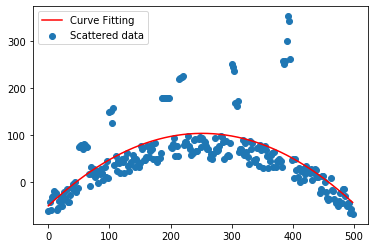

In [58]:
plt.scatter(x, y, label = 'Scattered data')
plt.plot(x, y_estimatereg , 'r', label = 'Curve Fitting')
plt.legend()
plt.show()